In [26]:
# function for later confusion matrix, just to setup the figure etc 
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(12,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Import relevant libraries

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline


## Explore the Kaggle Titanic competition data 

In [98]:
data_path = '/home/ubuntu/data/titanic'
titanic_df = pd.read_csv(data_path + '/train.csv')
train_df = titanic_df 
test_df = pd.read_csv(data_path + '/test.csv')
combine = [train_df, test_df]

In [7]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
test_submission = pd.read_csv(data_path + '/gender_submission.csv')
test_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train_df[['Sex', 'Survived']].groupby(['Sex']).size()

Sex
female    314
male      577
dtype: int64

In [16]:
train_df[['Sex', 'Survived']].groupby(['Sex','Survived']).size(), 

(Sex     Survived
 female  0            81
         1           233
 male    0           468
         1           109
 dtype: int64,)

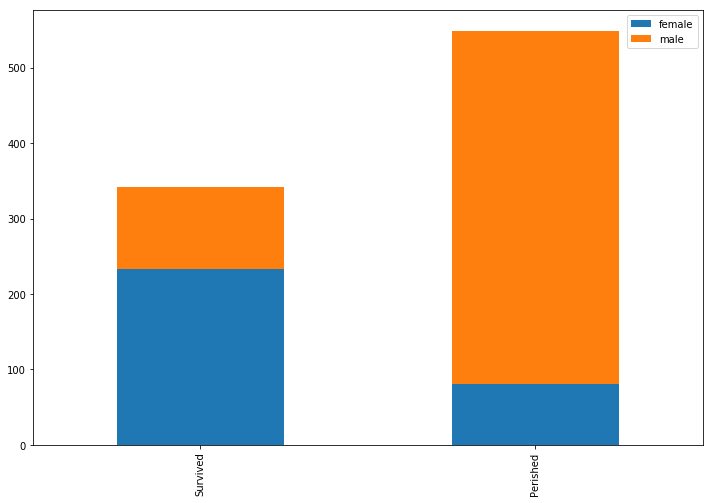

In [17]:
survived_sex = titanic_df[titanic_df['Survived']==1]['Sex'].value_counts()
dead_sex = titanic_df[titanic_df['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Perished']
df.plot(kind='bar',stacked=True, figsize=(12,8))

The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

- We may combine mulitple workflow stages. We may analyze by visualizing data.
- Perform a stage earlier than indicated. We may analyze data before and after wrangling.
- Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
- Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.


## Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying.** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating.** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a [correlation](https://en.wikiversity.org/wiki/Correlation) among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting.** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating.** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting.** How to select the right visualization plots and charts depending on nature of the data and the solution goals.

## Make a submission to Kaggle

In [18]:
df_ids = test_df[['PassengerId']]
df = pd.DataFrame(np.ones(len(test_df),dtype=np.int))
subm_df = df_ids.join(df)

In [19]:
subm_df.values[0:5]

array([[892,   1],
       [893,   1],
       [894,   1],
       [895,   1],
       [896,   1]])

In [20]:
from IPython.display import FileLink

%cd /home/ubuntu/data/titanic/submissions
submission_file_name = 'submis_all_1.csv'
np.savetxt(submission_file_name, subm_df.values, fmt='%d,%d', header='PassengerId,Survived', comments='')

FileLink('/home/ubuntu/data/titanic/submissions/submis_all_1.csv')

/home/ubuntu/data/titanic/submissions


/home/ubuntu/data/titanic/submissions/submis_all_1.csv

In [21]:
# submitted at this point with an accuracy score of 0.37321 on the test data
# make the calculation for accuracy here - then use scikit learns version, 
# change the submission 1 only for 1st class women

# make a submission to Kaggle
pred_ids = train_df[['PassengerId', 'Survived']]
pred_surv = pd.DataFrame(np.zeros(len(train_df),dtype=np.int), columns={'Predict'})
pred_df = pred_ids.join(pred_surv)
pred_df[0:5]

,PassengerId,Survived,Predict
0,1,0,0
1,2,1,0
2,3,1,0
3,4,1,0
4,5,0,0


## Determine the accuracy locally

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(pred_df['Survived'], pred_df['Predict'])

0.61616161616161613

Confusion matrix, without normalization
[[549   0]
 [342   0]]


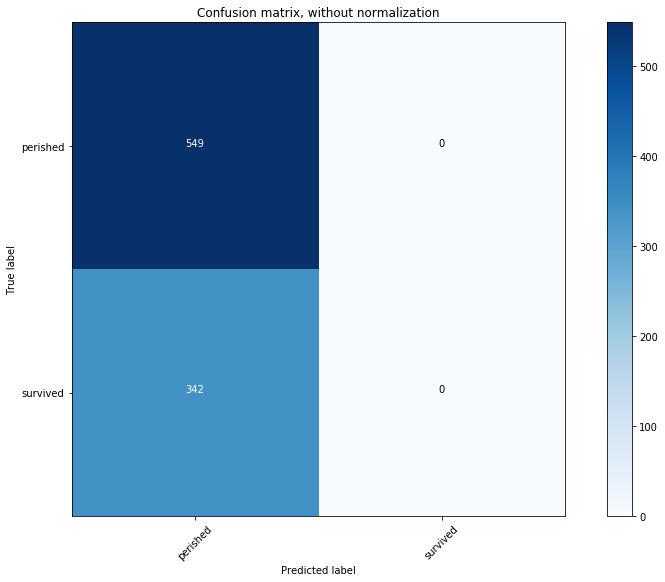

In [27]:
from sklearn.metrics import confusion_matrix

# 0: perished, 1: survived
# y axis is true, x axis is prediction

cnf_matrix = confusion_matrix(pred_df['Survived'], pred_df['Predict'])

class_names = np.array(['perished', 'survived'])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

## Improve prediction using knowledge gained from EDA

In [28]:
pred_df.Predict = 0
pred_df.Predict[(train_df.Pclass == 1)|(train_df.Pclass == 2)] = 1
accuracy_score(pred_df['Survived'], pred_df['Predict'])

0.66778900112233441

In [29]:
pred_df.Predict = 0
pred_df.Predict[train_df.Sex == 'female'] = 1
accuracy_score(pred_df['Survived'], pred_df['Predict'])

0.78675645342312006

Confusion matrix, without normalization
[[468  81]
 [109 233]]


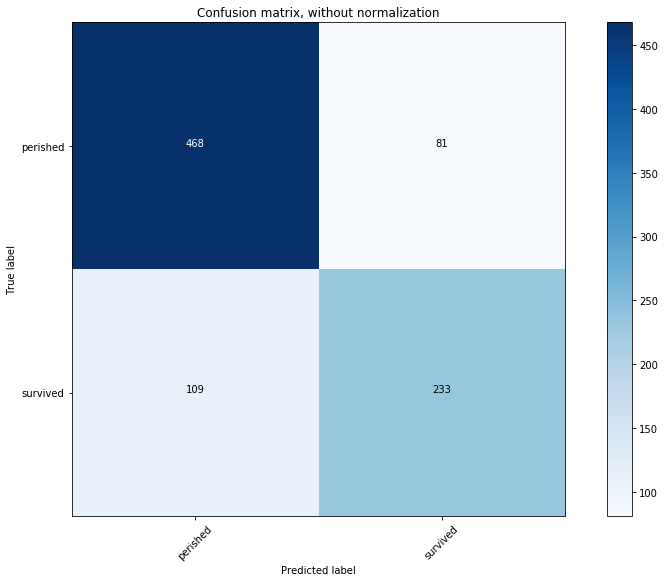

In [30]:
plt.figure()
cnf_matrix = confusion_matrix(pred_df['Survived'], pred_df['Predict'])
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

In [31]:
bins = [0, 10, 20, 30, 520]
group_names = ['Cheapest', 'Cheap', 'Middle', 'Expensive']
train_df['FareGroup'] = pd.cut(train_df['Fare'], bins, labels=group_names)

train_df[['FareGroup', 'Survived', 'Sex']].groupby(['FareGroup', 'Sex'], as_index=False).mean()

,FareGroup,Sex,Survived
0,Cheapest,female,0.593750
1,Cheapest,male,0.108949
2,Cheap,female,0.730769
3,Cheap,male,0.188119
4,Middle,female,0.694915
5,Middle,male,0.265060
6,Expensive,female,0.858407
7,Expensive,male,0.322314


In [32]:
pred_df.Predict[train_df.FareGroup == 'Cheapest'] = 0
accuracy_score(pred_df['Survived'], pred_df['Predict'])

0.77328843995510665

In [50]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg.fit(X_train2, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train2, Y_train) 


0.78451178451178449

In [51]:
pred_df.head()

,PassengerId,Survived,Predict
0,1,0,0
1,2,1,1
2,3,1,0
3,4,1,1
4,5,0,0


## Can we find something to search the combination of parameters for us

In [52]:
# define training and testing sets

Y_train = titanic_df["Survived"]
X_test  = test_df.drop(['PassengerId','Cabin','Name','Ticket','Embarked'],axis=1)

In [53]:
X_train2 = titanic_df.drop(['PassengerId','Cabin','Survived','Name','Ticket','Embarked','FareGroup'],axis=1)

## We need to remove the categorical values

In [54]:
# X_train2['Sex'].astype(int)
gender_code = {"male":0 ,"female" :1}
X_train2['Gender'] = X_train2['Sex'].apply(gender_code.get).astype(float)
X_train2 = X_train2.drop(['Sex'], axis=1)

## If you run any models at this point they will fail due to null values

In [55]:
X_train2.isnull().sum()

Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
Gender      0
dtype: int64

In [56]:
X_train2.loc[X_train2['Age'].isnull()] = 0
X_train2.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
Gender    0
dtype: int64

In [57]:
# do the same to the test set so it is the same as X_train2
X_test['Gender'] = X_test['Sex'].apply(gender_code.get).astype(float)
X_test = X_test.drop(['Sex'], axis=1)
X_test.loc[X_test['Age'].isnull()] = 0
X_test.loc[X_test['Fare'].isnull()] = 0

In [59]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg.fit(X_train2, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train2, Y_train) 

0.76655443322109984

## Decision Tree

In [58]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train2, Y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train2, Y_train)

# 0.7 on Kaggle

0.93041526374859707

Confusion matrix, without normalization
[[549   0]
 [ 62 280]]


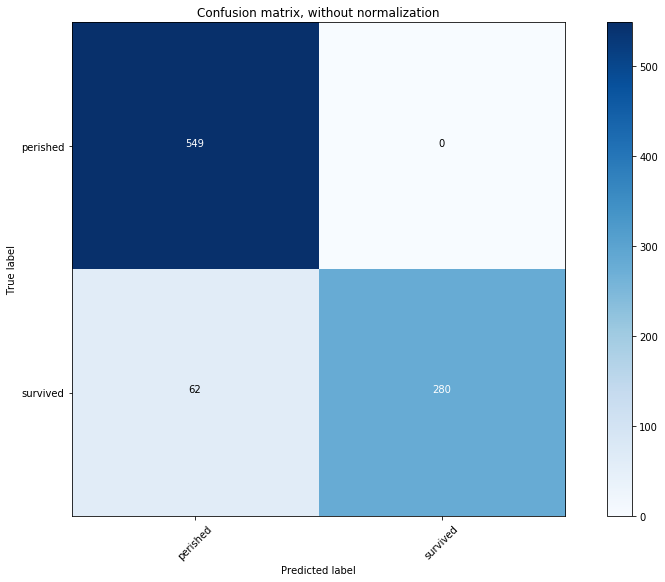

In [41]:
Y_train_pred = clf.predict(X_train2)
cnf_matrix = confusion_matrix(Y_train, Y_train_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

## Imputing data

In [42]:
# sort out the age data and the fare data to input the mean

In [43]:
X_train2.loc[X_train2['Age']==0] = X_train2['Age'].mean()
X_train2.describe()

,Pclass,Age,SibSp,Parch,Fare,Gender
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,6.520174,28.527099,5.138580,5.073485,32.530143,5.020735
std,8.640650,13.213618,9.333464,9.359929,47.564641,9.364935
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,9.500000,0.000000
50%,3.000000,24.000000,0.000000,0.000000,23.799293,0.000000
75%,3.000000,35.000000,2.000000,2.000000,27.900000,1.000000
max,23.799293,80.000000,23.799293,23.799293,512.329200,23.799293


In [60]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg.fit(X_train2, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train2, Y_train) 

0.76655443322109984

In [62]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train2, Y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train2, Y_train)


0.93041526374859707

## Feature engineering

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(X_train2, Y_train)

In [64]:
features = pd.DataFrame()
features['feature'] = X_train2.columns
features['importance'] = clf.feature_importances_
features.sort_values(['importance'],ascending=False)

,feature,importance
5,Gender,0.287256
1,Age,0.267704
4,Fare,0.249415
0,Pclass,0.110757
3,Parch,0.043423
2,SibSp,0.041445


In [65]:
# add the cabin column? and family size 
X_train2.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
Gender    0
dtype: int64

In [67]:
X_train2.head()

,Pclass,Age,SibSp,Parch,Fare,Gender,IsAlone
0,3,22.0,1,0,7.2500,0.0,0
1,1,38.0,1,0,71.2833,1.0,0
2,3,26.0,0,0,7.9250,1.0,0
3,1,35.0,1,0,53.1000,1.0,0
4,3,35.0,0,0,8.0500,0.0,0


In [106]:
full_data = [X_train, X_test]

for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
for dataset in full_data:
    dataset['Child'] = 0
    dataset.loc[dataset['Age'] < 16, 'Child'] = 1

KeyError: 'SibSp'

In [105]:
X_train = titanic_df.drop(['PassengerId','Cabin','Survived','Name','Ticket'],axis=1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,3,male,22.0,1,0,7.2500,0,0
1,1,female,38.0,1,0,71.2833,1,0
2,3,female,26.0,0,0,7.9250,0,0
3,1,female,35.0,1,0,53.1000,0,0
4,3,male,35.0,0,0,8.0500,0,0


In [100]:
embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

In [69]:
# check this bit

coeff_df = pd.DataFrame(X_train2.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,Gender,2.572648
4,Fare,0.012137
1,Age,-0.010334
3,Parch,-0.130495
2,SibSp,-0.269300
0,Pclass,-0.363473
6,IsAlone,NaN
7,FamilySize,NaN
8,Child,NaN


In [272]:
logreg = LogisticRegression()
logreg.fit(X_train2, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train2, Y_train) * 100, 2)
acc_log



79.239999999999995

In [274]:
# Random Forests - might be better if have more features. 
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=10)
random_forest.fit(X_train2, Y_train)
Y_pred = random_forest.predict(X_test)
# random_forest.score(X_train2, Y_train)
Y_train_pred = random_forest.predict(X_train2)
accuracy_score(Y_train, Y_train_pred)
acc_log = round(random_forest.score(X_train2, Y_train) * 100, 2)
acc_log

93.040000000000006

In [256]:
count = len(["ok" for idx, label in enumerate(Y_train) if label == Y_train_pred[idx]])
# print "Accuracy Rate, which is calculated manually is: %f" % (float(count) / len(test_labels))
# Accuracy = (Number of elements correctly classified)/(Total elements)
len(Y_train)

(549+280)

829

Confusion matrix, without normalization
[[549   0]
 [ 62 280]]


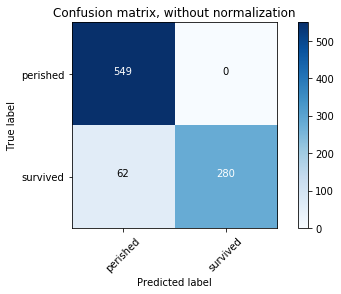

In [231]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [121]:
%cd /home/ubuntu/data/titanic/submissions

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic_randomForest.csv', index=False)

/home/ubuntu/data/titanic/submissions


In [ ]:
embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

## Grid search

In [203]:
from sklearn.model_selection import StratifiedKFold

forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,6,7,8],
                 'n_estimators': range(200,300,10),
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(Y_train)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X_train2, Y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

ValueError: The number of folds must be of Integral type. 0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64 of type <class 'pandas.core.series.Series'> was passed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


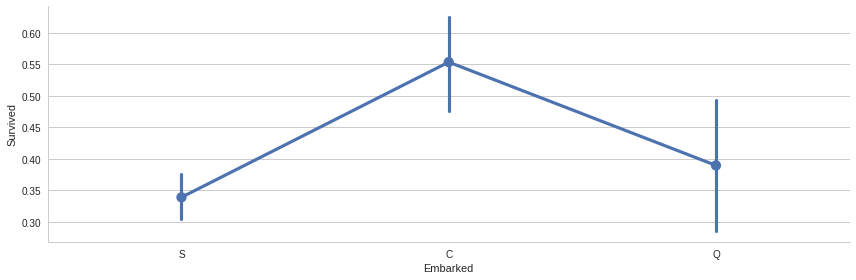

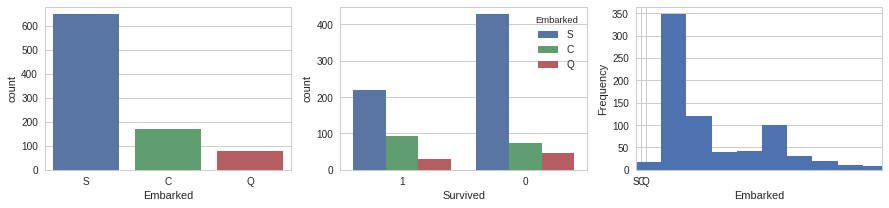

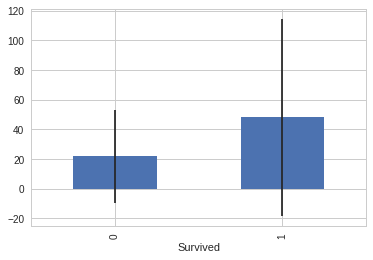

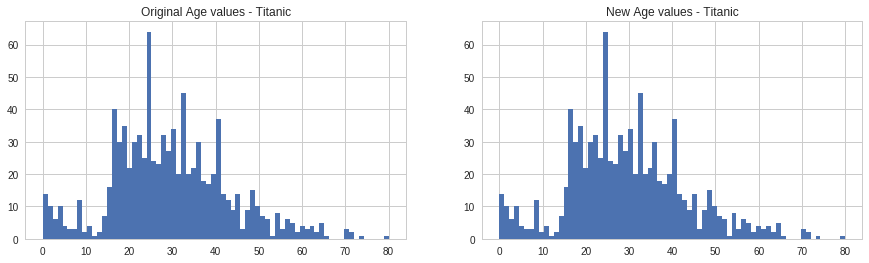

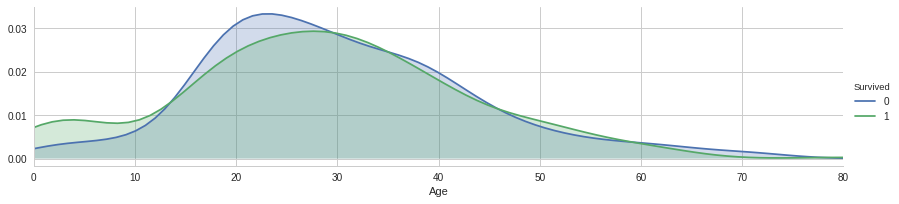

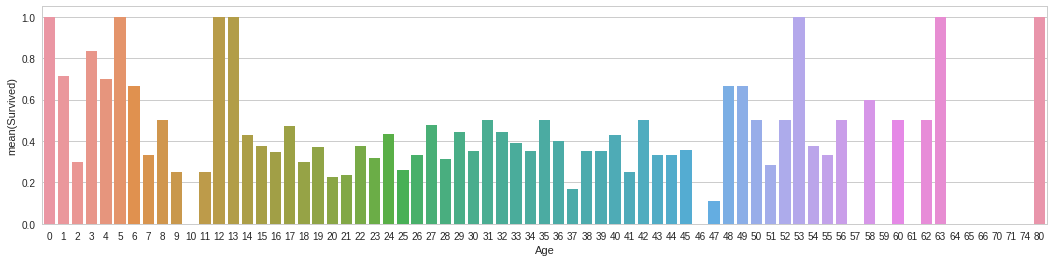

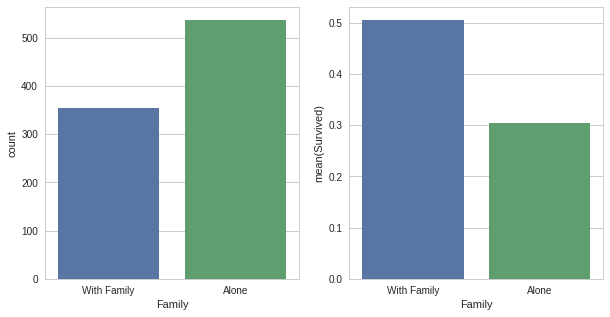

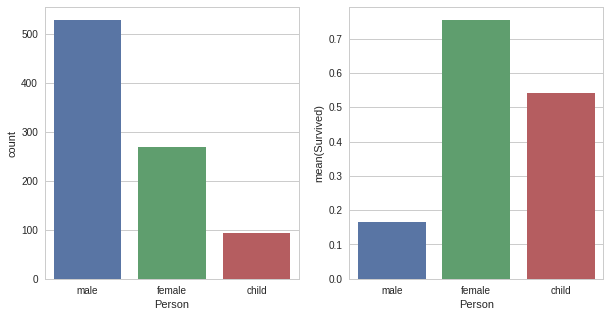

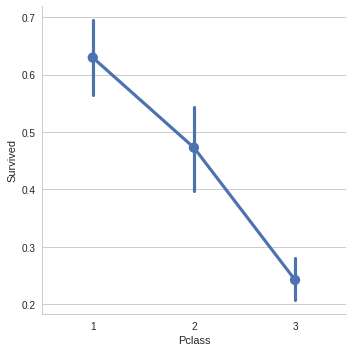

In [71]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# get titanic & test csv files as a DataFrame

data_path = '/home/ubuntu/data/titanic'


titanic_df = pd.read_csv(data_path + '/train.csv', dtype={"Age": np.float64}, )
test_df    = pd.read_csv(data_path + '/test.csv', dtype={"Age": np.float64}, )

# preview the data
titanic_df.head()
titanic_df.info()
print("----------------------------")
test_df.info()
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)
# Embarked

# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

# plot
sns.factorplot('Embarked','Survived', data=titanic_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# sns.factorplot('Embarked',data=titanic_df,kind='count',order=['S','C','Q'],ax=axis1)
# sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

# Either to consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)
# Fare

# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)
# Age 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# get average, std, and number of NaN values in titanic_df
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)

# plot original Age values
titanic_df['Age'].hist(bins=70, ax=axis1)
# test_df['Age'].hist(bins=70, ax=axis3)
        
# plot new Age Values
titanic_df['Age'].hist(bins=70, ax=axis2)
# test_df['Age'].hist(bins=70, ax=axis4)
# .... continue with plot Age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)
# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

# drop Parch & SibSp
titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Male','Female','Child']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Male','Female','Child']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic_df = titanic_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=titanic_df, ax=axis1)

# average of survived for each Person(male, female, or child)
family_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=family_perc, ax=axis2, order=['male','female','child'])

titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_df,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)
# define training and testing sets

X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)
# Support Vector Machines

# svc = SVC()

# svc.fit(X_train, Y_train)

# Y_pred = svc.predict(X_test)

# svc.score(X_train, Y_train)
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
# knn = KNeighborsClassifier(n_neighbors = 3)

# knn.fit(X_train, Y_train)

# Y_pred = knn.predict(X_test)

# knn.score(X_train, Y_train)
# Gaussian Naive Bayes

# gaussian = GaussianNB()

# gaussian.fit(X_train, Y_train)

# Y_pred = gaussian.predict(X_test)

# gaussian.score(X_train, Y_train)
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)

In [72]:
random_forest.score(X_train, Y_train)


0.96184062850729513

In [73]:
logreg.score(X_train, Y_train)

0.8058361391694725

In [75]:
import os
os.getcwd()

'/home/ubuntu/data/titanic/submissions'

In [92]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train3, Y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train3, Y_train)


0.91245791245791241

In [78]:
X_train.head()

,Age,Fare,C,Q,Family,Female,Child,Class_1,Class_2
0,22,7,0,0,1,0,1,0,0
1,38,71,1,0,1,1,0,1,0
2,26,7,0,0,0,1,0,0,0
3,35,53,0,0,1,1,0,1,0
4,35,8,0,0,0,0,1,0,0


In [87]:
X_train3 = X_train2.astype(int)